# Imports

In [337]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import os
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors


palette = sns.color_palette("vlag", as_cmap=True)

from sklearn.cluster import KMeans

# pd.set_option("display.max_rows", None, "display.max_columns", None)
# pd.reset_option('all')

# Get data and make pairs of features

In [338]:
pwd = os.getcwd()
df = pd.read_csv(pwd + '\data\wine.csv')
df['class'] = df['class'] - 1

print(df)

features = list(df.columns)
features.remove('class')

pairs = [(i, j) for i in features for j in features]
for elem in pairs:
    if elem[0] == elem[1]:
        pairs.remove(elem)

# print(pairs)

     class  alcohol  malic-acid   ash  alcanity-of-ash  magnesium  phenols  \
0        0    14.23        1.71  2.43             15.6        127     2.80   
1        0    13.20        1.78  2.14             11.2        100     2.65   
2        0    13.16        2.36  2.67             18.6        101     2.80   
3        0    14.37        1.95  2.50             16.8        113     3.85   
4        0    13.24        2.59  2.87             21.0        118     2.80   
..     ...      ...         ...   ...              ...        ...      ...   
173      2    13.71        5.65  2.45             20.5         95     1.68   
174      2    13.40        3.91  2.48             23.0        102     1.80   
175      2    13.27        4.28  2.26             20.0        120     1.59   
176      2    13.17        2.59  2.37             20.0        120     1.65   
177      2    14.13        4.10  2.74             24.5         96     2.05   

     flavanoids  nonflavanoid-phenols  proanthocyanins  color-i

# Visualize pairs

156


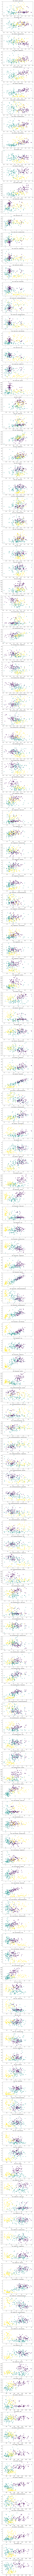

In [339]:
f, axes = plt.subplots(len(pairs), 1, figsize=(8, 700))

print(len(axes))
i = 0

for elem in pairs:
    axes[i].scatter(df[elem[0]], df[elem[1]], c=df['class'])
    axes[i].set_title('Pair: ' + elem[0] + ' - ' + elem[1])
    i += 1

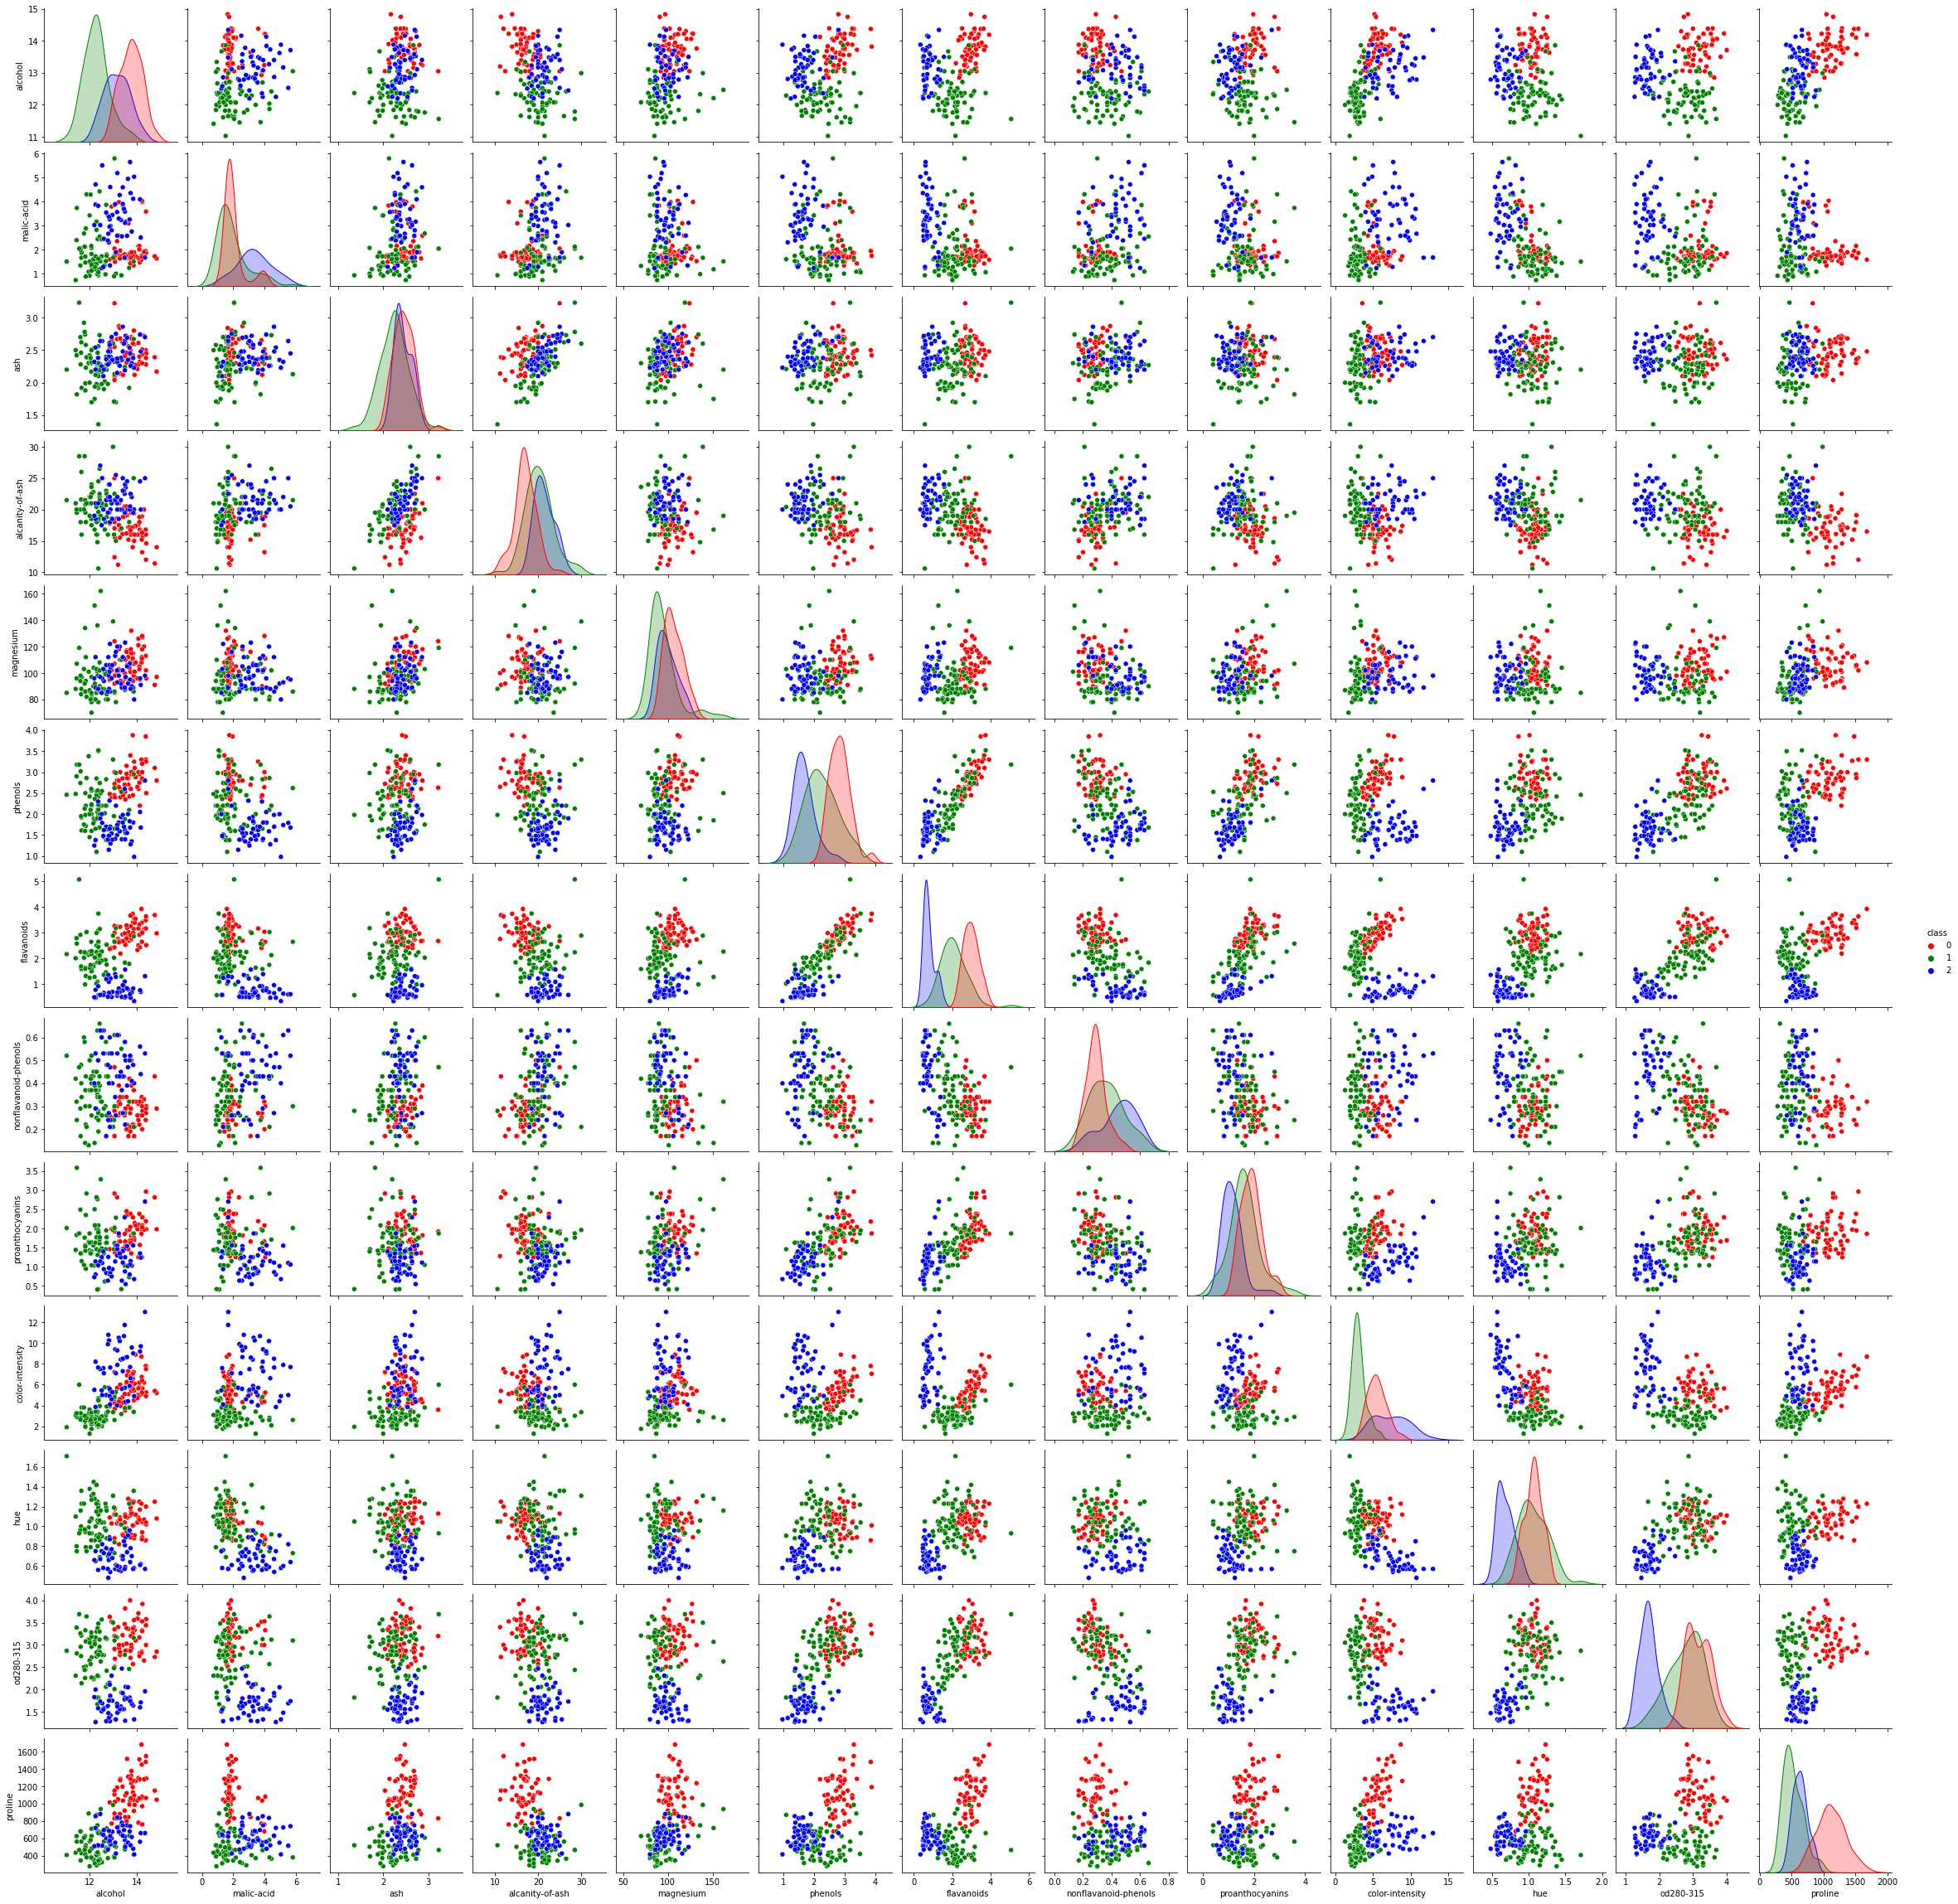

In [340]:
df_pairs = df.drop('class', axis=1)

sns.pairplot(df, hue='class', palette={0: 'r', 1: 'g', 2: 'b'});

In [341]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements

def show_accuracy(res, real):
    cm = confusion_matrix(res, real)
    print("Accuracy: ", accuracy(cm), '\n')

[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 0 2 0 0 2 2 2 0 0 1
 2 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2
 2 0 0 0 0 2 2 2 0 2 2 2 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Accuracy:  0.16853932584269662 



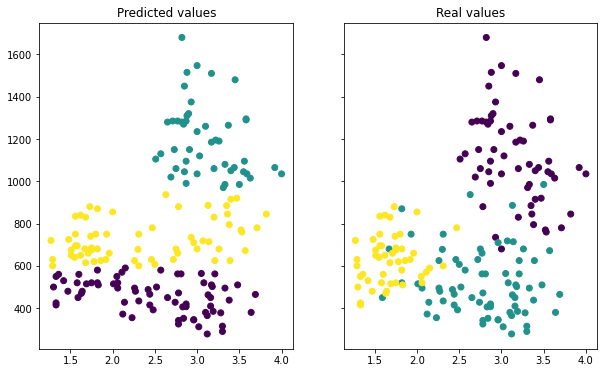

In [342]:
features = ['od280-315', 'proline']

model = KMeans(n_clusters=3, init='random', n_init=20)
model.fit(df[features])

res = model.labels_
real = np.array(df['class'])

print(res)
print(real)
show_accuracy(res, real)


f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,6))
ax1.set_title('Predicted values')
ax1.scatter(df[features[0]], df[features[1]], c=model.labels_)
ax2.set_title('Real values')
ax2.scatter(df[features[0]], df[features[1]], c=np.array(df['class']));

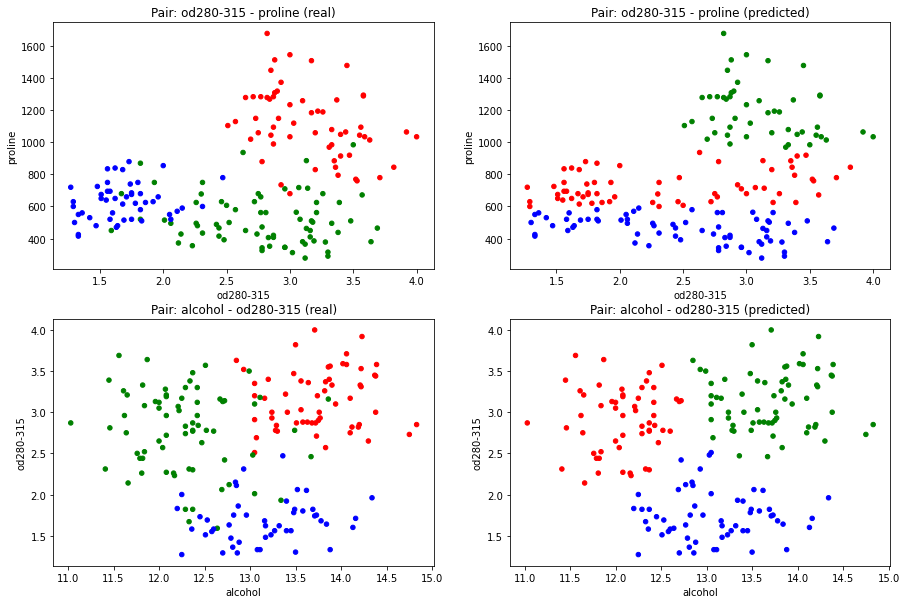

In [343]:
features = [['od280-315', 'proline'], ['alcohol', 'od280-315']]
sz = (15, 10)
fig, axes = plt.subplots(nrows=len(features), ncols=2, figsize=sz)

def visualize(df, features):
    i = 0
    
    for pair in features:
        temp_df = df[pair]
        
        model = KMeans(n_clusters=3, n_init=20)
        model.fit(df[pair])

        res = np.array(model.labels_)
        real = np.array(df['class'])
        
        colors = {0: 'r', 1: 'g', 2: 'b'}
        colored_res = pd.Series(res).replace(colors)
        colored_real = pd.Series(real).replace(colors)
        
        temp_df.plot(ax=axes[i,0], x=pair[0], y=pair[1], kind='scatter', 
                     figsize=sz, title=str('Pair: ' + str(pair[0]) + ' - ' + str(pair[1]) + ' (real)'),
                     color=colored_real)
        
        temp_df.plot(ax=axes[i,1], x=pair[0], y=pair[1], kind='scatter', 
                     figsize=sz, title=str('Pair: ' + str(pair[0]) + ' - ' + str(pair[1]) + ' (predicted)'),
                     color=colored_res)
        
        i += 1
    
visualize(df, features)